In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')
import nltk

In [6]:
# Load files 2021
da21 = pd.read_excel('2021.xlsx')
da21.head(2)

Respondent ID          Start Date  ... Unnamed: 159  33
0   1.276177e+10 2021-06-22 11:21:40  ...          NaN NaN
1   1.275934e+10 2021-06-21 17:47:14  ...          NaN NaN

[2 rows x 161 columns]

In [8]:
# Rename bettercommunication
da21.rename(columns = {'29. How can we communicate with you better? __________':'bettercommunication'},inplace = True)

In [9]:
da21_clean = da21['bettercommunication'].dropna()

In [10]:
da21_clean = da21_clean.reset_index()
da21_clean = da21_clean.drop(columns=['index'])

In [11]:
# 4.Topic modelling
from nltk.stem import PorterStemmer
import re

In [12]:
#Data Cleaning by removing punctuations, numbers, special characters, and short words
documents = da21_clean['bettercommunication']
Cleaned_doc = []
for r in range(len(documents)):
    tweet = documents[r]
    try:
        tweet = re.sub('[^A-Za-z]', ' ', tweet) #removing everything except alphabets
        tweet = tweet.lower() #lowercase
        Tokens = tweet.split() #tokenization
        Filtered_token = [w for w in Tokens if len(w)>3] # removing short words
        tweet = ' '.join(Filtered_token) 
    except:
        continue
#Save cleaned text
    Cleaned_doc.append(tweet) 
    print('-[Tweet Text]: ', tweet)

-[Tweet Text]:  need change
-[Tweet Text]:  facebook
-[Tweet Text]:  continue
-[Tweet Text]:  
-[Tweet Text]:  think great with emails
-[Tweet Text]:  doing good
-[Tweet Text]:  email
-[Tweet Text]:  through local committee
-[Tweet Text]:  through sessions
-[Tweet Text]:  
-[Tweet Text]:  great with phone emails always find philinc optusnet
-[Tweet Text]:  emails social media
-[Tweet Text]:  there enough communication
-[Tweet Text]:  nothing note
-[Tweet Text]:  local choir what sapp messages
-[Tweet Text]:  what have been doing perfectly okay
-[Tweet Text]:  newsletters evert once while
-[Tweet Text]:  
-[Tweet Text]:  think already doing great
-[Tweet Text]:  happy with newsletters
-[Tweet Text]:  platform suits everyone find facebook itself inconsistent communication users
-[Tweet Text]:  more newsletter about other choirs members more human interest stuff
-[Tweet Text]:  
-[Tweet Text]:  emails work best announcements notices choir reception desk billboard type thing that people pe

In [14]:
  >>> import nltk
  >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
#Remove the stop-words from the text data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words = ['https','because','please','very','thank','call','watch','look','today','something','someone',
 'anyone','anything','everyone','everything','thanks','care','thing','doesn','things']
# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
            each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item) 
    print('-[Cleaned Text]: ', Cleaned_doc[r])

-[Cleaned Text]:  need change
-[Cleaned Text]:  facebook
-[Cleaned Text]:  continue
-[Cleaned Text]:  
-[Cleaned Text]:  think great with emails
-[Cleaned Text]:  doing good
-[Cleaned Text]:  email
-[Cleaned Text]:  through local committee
-[Cleaned Text]:  through sessions
-[Cleaned Text]:  
-[Cleaned Text]:  great with phone emails always find philinc optusnet
-[Cleaned Text]:  emails social media
-[Cleaned Text]:  there enough communication
-[Cleaned Text]:  nothing note
-[Cleaned Text]:  local choir what sapp messages
-[Cleaned Text]:  what have been doing perfectly okay
-[Cleaned Text]:  newsletters evert once while
-[Cleaned Text]:  
-[Cleaned Text]:  think already doing great
-[Cleaned Text]:  happy with newsletters
-[Cleaned Text]:  platform suits find facebook itself inconsistent communication users
-[Cleaned Text]:  more newsletter about other choirs members more human interest stuff
-[Cleaned Text]:  
-[Cleaned Text]:  emails work best announcements notices choir reception d

In [20]:
  >>> import nltk
  >>> nltk.download('punkt')
  >>> nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [21]:
#Select only nouns
Cleaned_doc_noun = Cleaned_doc
for r in range(len(Cleaned_doc_noun)):
    lines = Cleaned_doc[r]
# function to test if something is a noun
    is_noun = lambda pos: pos[:2] == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'
 # do the nlp stuff
    tokenized = nltk.word_tokenize(lines)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    Cleaned_doc_noun[r] = ' '.join(nouns) 
    print('-[Cleaned Text Noun]: ', Cleaned_doc_noun[r])

-[Cleaned Text Noun]:  need change
-[Cleaned Text Noun]:  facebook
-[Cleaned Text Noun]:  continue
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  emails
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  email
-[Cleaned Text Noun]:  committee
-[Cleaned Text Noun]:  sessions
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  phone emails optusnet
-[Cleaned Text Noun]:  emails media
-[Cleaned Text Noun]:  communication
-[Cleaned Text Noun]:  nothing note
-[Cleaned Text Noun]:  choir messages
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  newsletters
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  newsletters
-[Cleaned Text Noun]:  platform suits communication users
-[Cleaned Text Noun]:  newsletter choirs members interest stuff
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  emails announcements notices reception desk billboard type people
-[Cleaned Text Noun]:  email fine
-[Cleaned Text Noun]:  avenues
-[Cleaned Text Noun]:  founder community
-[Cleaned Text Noun]:  read
-[

In [ ]:
# 4.2 Term document matrix

In [22]:
#Fit and transform the processed titles
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer() 
count_data = count_vectorizer.fit_transform(Cleaned_doc_noun)
count_data

<139x149 sparse matrix of type '<class 'numpy.int64'>'
	with 251 stored elements in Compressed Sparse Row format>

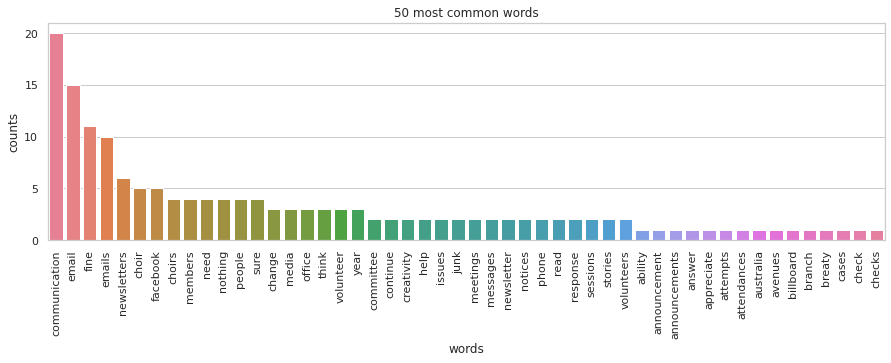

In [23]:
#Visualise most common words
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

terms = count_vectorizer.get_feature_names()
# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]
count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50] #Take the top 50 words
 
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
 
plt.figure(2, figsize=(15, 4))
plt.subplot(title='50 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [ ]:
# 4.3/ Term selection

In [24]:
#Remove highly frequent as from above graph and infrequent words from the Dataset
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 30 and total_counts[t] > 1:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex] 
ReducedCount

Number of Terms Remained:  35


<139x35 sparse matrix of type '<class 'numpy.int64'>'
	with 137 stored elements in Compressed Sparse Row format>

In [ ]:
#4.4. Topic number

In [25]:
#Install Gensim package
!pip install Cython
!pip install gensim

In [26]:
#Data Preparation
Cleaned_doc_noun_new = []
print('CLEANED TEXT NEW: ')
for r in range(len(Cleaned_doc_noun)):
    each_item = []
    for t in Cleaned_doc_noun[r].split():
 #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
            each_item.append(t)
    Cleaned_doc_noun_new.append(each_item) 
    print(Cleaned_doc_noun_new[r])

CLEANED TEXT NEW: 
['need', 'change']
['facebook']
['continue']
[]
['emails']
[]
['email']
['committee']
['sessions']
[]
['phone', 'emails']
['emails', 'media']
['communication']
['nothing']
['choir', 'messages']
[]
['newsletters']
[]
[]
['newsletters']
['communication']
['newsletter', 'choirs', 'members']
[]
['emails', 'notices', 'people']
['email', 'fine']
[]
[]
['read']
[]
[]
['newsletters']
[]
['emails']
[]
[]
['people']
['nothing', 'think']
['communication']
['email']
[]
['email']
[]
['facebook']
[]
['email']
['continue', 'communication', 'media', 'emails']
[]
[]
[]
[]
['members', 'members']
['email']
['communication', 'fine']
['newsletter']
['fine']
[]
['nothing']
['choirs']
['office', 'choirs', 'sessions']
['fine']
['fine']
[]
[]
['junk', 'emails']
['read', 'emails']
['sure']
['media']
['communication']
[]
['communication']
[]
[]
['need', 'change', 'communication']
[]
['email']
['phone']
['communication']
['need']
['communication', 'choir']
[]
['choir', 'facebook']
['email']
['e

In [27]:
import gensim.corpora as corpora
# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_noun_new)
print(id2word.token2id)

{'change': 0, 'need': 1, 'facebook': 2, 'continue': 3, 'emails': 4, 'email': 5, 'committee': 6, 'sessions': 7, 'phone': 8, 'media': 9, 'communication': 10, 'nothing': 11, 'choir': 12, 'messages': 13, 'newsletters': 14, 'choirs': 15, 'members': 16, 'newsletter': 17, 'notices': 18, 'people': 19, 'fine': 20, 'read': 21, 'think': 22, 'office': 23, 'junk': 24, 'sure': 25, 'creativity': 26, 'issues': 27, 'meetings': 28, 'stories': 29, 'volunteer': 30, 'help': 31, 'response': 32, 'year': 33, 'volunteers': 34}


In [28]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_noun_new]
print(Corpus)

[[(0, 1), (1, 1)], [(2, 1)], [(3, 1)], [], [(4, 1)], [], [(5, 1)], [(6, 1)], [(7, 1)], [], [(4, 1), (8, 1)], [(4, 1), (9, 1)], [(10, 1)], [(11, 1)], [(12, 1), (13, 1)], [], [(14, 1)], [], [], [(14, 1)], [(10, 1)], [(15, 1), (16, 1), (17, 1)], [], [(4, 1), (18, 1), (19, 1)], [(5, 1), (20, 1)], [], [], [(21, 1)], [], [], [(14, 1)], [], [(4, 1)], [], [], [(19, 1)], [(11, 1), (22, 1)], [(10, 1)], [(5, 1)], [], [(5, 1)], [], [(2, 1)], [], [(5, 1)], [(3, 1), (4, 1), (9, 1), (10, 1)], [], [], [], [], [(16, 2)], [(5, 1)], [(10, 1), (20, 1)], [(17, 1)], [(20, 1)], [], [(11, 1)], [(15, 1)], [(7, 1), (15, 1), (23, 1)], [(20, 1)], [(20, 1)], [], [], [(4, 1), (24, 1)], [(4, 1), (21, 1)], [(25, 1)], [(9, 1)], [(10, 1)], [], [(10, 1)], [], [], [(0, 1), (1, 1), (10, 1)], [], [(5, 1)], [(8, 1)], [(10, 1)], [(1, 1)], [(10, 1), (12, 1)], [], [(2, 1), (12, 1)], [(5, 1)], [(5, 1)], [(10, 1), (12, 1), (14, 1), (26, 1)], [(13, 1)], [], [], [(0, 1), (10, 2), (27, 1), (28, 1)], [(10, 1)], [(10, 1), (20, 1)], [

In [29]:
#Gensim LDA Model
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint
#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
 id2word=id2word,
num_topics=15,
random_state=100)
#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.127*"choir" + 0.065*"communication" + 0.065*"email" + 0.065*"fine" + '
  '0.065*"people" + 0.065*"newsletters" + 0.065*"sessions" + 0.065*"choirs" + '
  '0.065*"junk" + 0.065*"office"'),
 (1,
  '0.174*"communication" + 0.174*"email" + 0.131*"year" + 0.089*"response" + '
  '0.089*"choirs" + 0.046*"facebook" + 0.046*"nothing" + 0.046*"change" + '
  '0.046*"issues" + 0.046*"meetings"'),
 (2,
  '0.249*"communication" + 0.188*"newsletters" + 0.127*"stories" + '
  '0.065*"need" + 0.065*"choir" + 0.065*"creativity" + 0.065*"members" + '
  '0.065*"change" + 0.004*"email" + 0.004*"fine"'),
 (3,
  '0.523*"fine" + 0.119*"email" + 0.062*"communication" + 0.062*"committee" + '
  '0.062*"volunteer" + 0.062*"nothing" + 0.004*"emails" + 0.004*"newsletters" '
  '+ 0.004*"sure" + 0.004*"facebook"'),
 (4,
  '0.248*"emails" + 0.248*"newsletters" + 0.128*"phone" + 0.128*"notices" + '
  '0.008*"communication" + 0.008*"email" + 0.008*"fine" + 0.008*"facebook" + '
  '0.008*"sure" + 0.008*"need"'),
 

In [30]:
#Compute topic coherence sore
from gensim.models import CoherenceModel
# Compute Coherence Score. Note: that CoherenceModel require 
# text input format (Cleaned_doc_new) instead of bag of word 
coherence_model_lda = CoherenceModel(model=lda_model, 
 texts=Cleaned_doc_noun_new, 
dictionary=id2word, 
coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.7462053582797032


In [31]:
#Experiment with Topic Numbers
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(2,16,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
 lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
 id2word=id2word,
num_topics=top,
random_state=100)
 #Keep the trained models
 Trained_Models.append(lda_model)
 #Compute coherence score for each model
 coherence_model_lda = CoherenceModel(model=lda_model, 
 texts=Cleaned_doc_noun_new, 
dictionary=id2word, 
coherence='c_v')
 coherence = coherence_model_lda.get_coherence()
 #Save and print the coherence scores 
 coherence_scores.append(coherence)
 print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.7168607533202326
Topic Number: 3 -- Coherence: 0.6937687858914926
Topic Number: 4 -- Coherence: 0.7230918256225798
Topic Number: 5 -- Coherence: 0.728936093572138
Topic Number: 6 -- Coherence: 0.7306445002038625
Topic Number: 7 -- Coherence: 0.7363291511689704
Topic Number: 8 -- Coherence: 0.7375783681233936
Topic Number: 9 -- Coherence: 0.7403952064715752
Topic Number: 10 -- Coherence: 0.7429939357589415
Topic Number: 11 -- Coherence: 0.7430671843887872
Topic Number: 12 -- Coherence: 0.7448921793000238
Topic Number: 13 -- Coherence: 0.7419910105380664
Topic Number: 14 -- Coherence: 0.7486568998426655
Topic Number: 15 -- Coherence: 0.7462053582797032


Text(0, 0.5, 'Coherence')

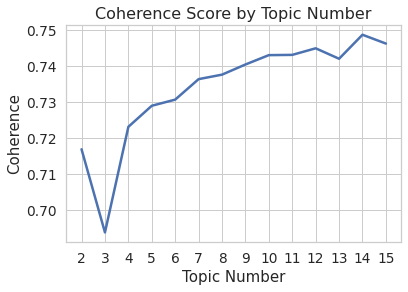

In [32]:
plt.plot(coherence_scores)
plt.xticks(range(0,len(Topics)),Topics)
plt.title('Coherence Score by Topic Number', fontsize=16)
plt.xlabel('Topic Number')
plt.ylabel('Coherence')

In [33]:
import numpy
lda_model = Trained_Models[numpy.argmax(coherence_scores)]
#Show top 10 words in each topic
lda_model.show_topics(num_words=10)

[(8,
  '0.267*"members" + 0.180*"need" + 0.093*"communication" + 0.093*"change" + 0.093*"choirs" + 0.093*"newsletter" + 0.006*"email" + 0.006*"emails" + 0.006*"sure" + 0.006*"fine"'),
 (0,
  '0.281*"choir" + 0.143*"communication" + 0.143*"fine" + 0.074*"email" + 0.074*"newsletters" + 0.074*"facebook" + 0.074*"messages" + 0.005*"emails" + 0.005*"sure" + 0.005*"need"'),
 (6,
  '0.143*"email" + 0.143*"choirs" + 0.143*"sessions" + 0.143*"office" + 0.143*"media" + 0.010*"communication" + 0.010*"fine" + 0.010*"emails" + 0.010*"sure" + 0.010*"newsletters"'),
 (11,
  '0.029*"communication" + 0.029*"email" + 0.029*"fine" + 0.029*"emails" + 0.029*"sure" + 0.029*"newsletters" + 0.029*"facebook" + 0.029*"need" + 0.029*"nothing" + 0.029*"volunteer"'),
 (1,
  '0.238*"email" + 0.120*"year" + 0.120*"communication" + 0.081*"response" + 0.081*"choirs" + 0.081*"sure" + 0.042*"facebook" + 0.042*"nothing" + 0.042*"newsletters" + 0.042*"choir"'),
 (5,
  '0.218*"volunteers" + 0.218*"office" + 0.113*"think" +

In [34]:
#4.5/ LDA Model
#Train LDA Model with 12 topics
from sklearn.decomposition import LatentDirichletAllocation as LDA
# Tweak the two parameters below
number_topics = 12
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

array([[ 0.08333333,  1.08333642,  0.08333333,  0.08333333,  0.08333333,
         0.08333333,  0.08333333,  0.08333333,  0.08333333,  0.08333333,
         0.08333333,  0.08333333,  0.08333333,  0.08333333,  0.08333333,
         0.08333333,  0.08333333,  2.08333333,  0.08333333,  0.08333333,
         0.08333333,  3.08333623,  0.08333333,  0.08333333,  0.08333333,
         0.08333333,  0.08333333,  0.08333333,  0.08333333,  0.08333333,
         0.08333333,  1.08333665,  0.08333333,  0.08333333,  0.08333333],
       [ 0.08333333,  0.08333333,  0.08333333,  0.08333333,  0.08333333,
         0.08333333,  0.08333333,  0.08333333,  0.08333333,  0.08333333,
         0.08333333,  0.08333333,  0.08333333,  0.08333333,  0.08333333,
         1.08333544,  0.08333333,  0.08333333,  0.08333333,  0.08333333,
         3.08334761,  0.08333333,  0.08333333,  2.08333806,  0.08333333,
         0.08333333,  0.08333333,  0.08333333,  0.08333333,  0.08333333,
         0.08333333,  1.0833387 ,  0.08333333,  2.

In [35]:
#Word Probablities by Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

[[0.00840335 0.10924391 0.00840335 0.00840335 0.00840335 0.00840335
  0.00840335 0.00840335 0.00840335 0.00840335 0.00840335 0.00840335
  0.00840335 0.00840335 0.00840335 0.00840335 0.00840335 0.21008384
  0.00840335 0.00840335 0.00840335 0.31092437 0.00840335 0.00840335
  0.00840335 0.00840335 0.00840335 0.00840335 0.00840335 0.00840335
  0.00840335 0.10924393 0.00840335 0.00840335 0.00840335]
 [0.00699299 0.00699299 0.00699299 0.00699299 0.00699299 0.00699299
  0.00699299 0.00699299 0.00699299 0.00699299 0.00699299 0.00699299
  0.00699299 0.00699299 0.00699299 0.09090907 0.00699299 0.00699299
  0.00699299 0.00699299 0.25874188 0.00699299 0.00699299 0.17482518
  0.00699299 0.00699299 0.00699299 0.00699299 0.00699299 0.00699299
  0.00699299 0.09090934 0.00699299 0.17482479 0.00699299]
 [0.0052356  0.0052356  0.19371731 0.0052356  0.0052356  0.0052356
  0.0052356  0.0052356  0.0052356  0.0052356  0.0052356  0.0052356
  0.0052356  0.0052356  0.0052356  0.0052356  0.25654449 0.0052356
  0

In [36]:
#Extract and view the top words in each topic
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
nothing : 0.311
messages : 0.210
think : 0.109
choir : 0.109
fine : 0.008

Topic #1:
newsletters : 0.259
office : 0.175
volunteers : 0.175
think : 0.091
meetings : 0.091

Topic #2:
members : 0.257
choirs : 0.194
stories : 0.131
sessions : 0.131
newsletters : 0.068

Topic #3:
media : 0.207
continue : 0.140
emails : 0.140
volunteer : 0.140
committee : 0.073

Topic #4:
facebook : 0.590
choir : 0.012
fine : 0.012
creativity : 0.012
communication : 0.012

Topic #5:
emails : 0.451
people : 0.228
junk : 0.116
notices : 0.060
phone : 0.005

Topic #6:
sure : 0.412
help : 0.210
committee : 0.109
fine : 0.008
creativity : 0.008

Topic #7:
fine : 0.386
year : 0.147
response : 0.100
phone : 0.100
choirs : 0.052

Topic #8:
communication : 0.597
choir : 0.128
newsletters : 0.065
change : 0.036
creativity : 0.034

Topic #9:
email : 0.688
fine : 0.141
think : 0.049
creativity : 0.004
communication : 0.004

Topic #10:
need : 0.345
newsletter : 0.176
change : 0.170
notices : 0.091
communicatio

In [37]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords

change     choir    choirs  ...  volunteer  volunteers      year
0   0.008403  0.109244  0.008403  ...   0.008403    0.008403  0.008403
1   0.006993  0.006993  0.006993  ...   0.006993    0.174825  0.006993
2   0.005236  0.005236  0.193717  ...   0.005236    0.005236  0.005236
3   0.005587  0.005587  0.005587  ...   0.139665    0.005587  0.005587
4   0.012048  0.012049  0.012048  ...   0.012048    0.012048  0.012048
5   0.004651  0.004651  0.004651  ...   0.004651    0.004651  0.004651
6   0.008403  0.008403  0.008403  ...   0.008403    0.008403  0.008403
7   0.003984  0.003984  0.051793  ...   0.003984    0.003984  0.147410
8   0.036065  0.127656  0.002605  ...   0.002605    0.002605  0.002605
9   0.003802  0.003802  0.003802  ...   0.003802    0.003802  0.003802
10  0.169931  0.007034  0.007035  ...   0.007034    0.007034  0.007034
11  0.012048  0.012048  0.012048  ...   0.156627    0.012048  0.012048

[12 rows x 35 columns]

In [38]:
!pip install wordcloud

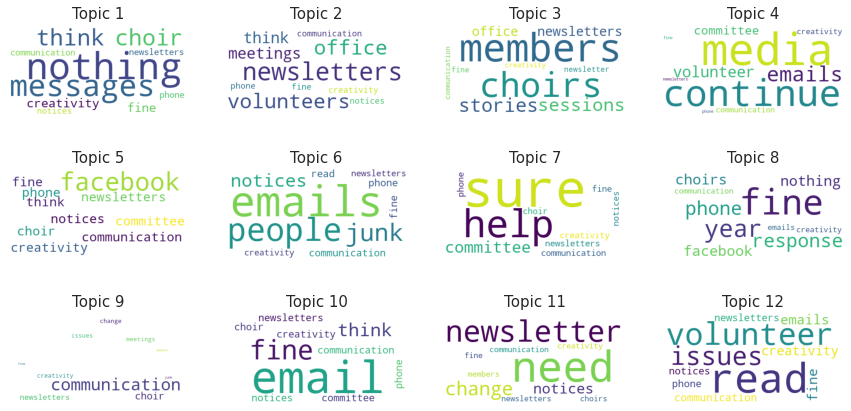

In [39]:
from wordcloud import WordCloud
import math
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = plt.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
 count_dict = (zip(ReducedTerm, topic))
 count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
 # convert to dictionary type - keep top 10 words
 Word_Frequency = dict(count_dict[0:10])
 # generate word cloud
 wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
 # visualize word cloud in figure
 subfig_Row = math.floor(topic_idx/4)
 subfig_Col = math.ceil(topic_idx%4)
 ax[subfig_Row,subfig_Col].imshow(wordcloud)
 ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1)) 
plt.show() 